In [1]:
# import numpy as np
# import mujoco
# import json
# import torch
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from DQNAgent import DQNAgent
# from pathlib import Path

# # Cargar configuración de Q-learning
# with open('qlearning.json', 'r') as file:
#     data = json.load(file)

# # Parámetros de DQN
# max_epsilon = data['max_epsilon']
# min_epsilon = data['min_epsilon']
# decay_rate = data['decay_rate']
# gamma = data['gamma']
# learning_rate = data['lr']
# memory_size = data['mem_size']
# batch_size = data['batchsize']

# # Cargar modelo MuJoCo
# model_dir = Path("trs_so_arm100")
# model_xml = model_dir / "scene.xml"

# class RoboticArmEnv():
#     def __init__(self):
#         # Load model.
#         self.model = mujoco.MjModel.from_xml_path(str(model_xml))
#         self.data = mujoco.MjData(self.model)

#         # Espacio de observación (posiciones y velocidades)
#         self.state_dim = self.model.nq + self.model.nv  # nq = posiciones, nv = velocidades
#         self.action_dim = self.model.nu  # Número de actuadores

#         # Discretización de acciones: cada articulación tiene 3 movimientos (-1, 0, 1)
#         self.num_actions = 3 ** self.action_dim  # Posibles combinaciones de acciones

#         # Agregar renderer para capturar imágenes
#         self.renderer = mujoco.Renderer(self.model)

#         self.agent = DQNAgent(state_dim=self.state_dim,
#                             num_actions=self.num_actions,
#                             action_dim=self.action_dim,
#                             gamma=gamma,
#                             epsilon=max_epsilon,
#                             epsilon_min=min_epsilon,
#                             epsilon_decay=decay_rate,
#                             learning_rate=learning_rate,
#                             memory_size=memory_size,
#                             batch_size=batch_size)


#         self.target_position = np.array([0.7, 1, 1.2, 0.7, 0.2, 0])  # Meta deseada
#         self.reset()

#     def step(self, action):
#         # Convertir acción discreta en torques continuos
#         action_values = [(a - 1) * 0.5 for a in action]  # Aplica la conversión a cada valor
#         self.data.ctrl[:] = action_values

#         mujoco.mj_step(self.model, self.data)

#         # Obtener observación
#         obs = np.concatenate([self.data.qpos, self.data.qvel])

#         # Calcular recompensa basada en distancia
#         distance = np.linalg.norm(self.target_position - self.data.qpos)
#         reward = -distance  # Penaliza la distancia a la meta

#         done = distance < 0.05  # Termina si alcanza la meta
#         return obs, reward, done

#     def reset(self):
#         mujoco.mj_resetData(self.model, self.data)
#         return np.concatenate([self.data.qpos, self.data.qvel])

#     def train(self, episodes=500):
#         success_history = []

#         for episode in tqdm(range(episodes)):
#             state = self.reset()
#             done = False
#             total_reward = 0
#             x = 0

#             while not done:
#                 action = self.agent.get_action(state)
#                 next_state, reward, done = self.step(action)

#                 # Guardar experiencia en memoria
#                 self.agent.store_transition(state, action, reward, next_state, done)

#                 # Entrenar el agente
#                 self.agent.replay()

#                 state = next_state
#                 total_reward += reward

#                 # Renderizar y mostrar un frame cada 1000 episodios
#                 if x % 10000 == 0 and x > 0:
#                     print(f"Rendering frame at episode {episode}...")
#                     self.renderer.update_scene(self.data)
#                     img = self.renderer.render()
#                     plt.imshow(img)
#                     plt.axis("off")
#                     plt.title(f"Frame at Episode {episode}")
#                     plt.show()
#                 x+=1    

#             success_history.append(total_reward)

#             if episode % 50 == 0:
#                 print(f"Episode {episode}: Reward {total_reward:.2f}")

#         # Guardar modelo entrenado
#         torch.save({
#             'policy_net_state_dict': self.agent.policy_net.state_dict(),
#             'target_net_state_dict': self.agent.target_net.state_dict(),
#             'optimizer_state_dict': self.agent.optimizer.state_dict(),
#         }, 'Checkpoint/dqn_robotic_arm.pth')

#         # Graficar desempeño
#         plt.plot(success_history)
#         plt.xlabel("Episode")
#         plt.ylabel("Total Reward")
#         plt.title("Training Progress")
#         plt.show()

# # Entrenar el agente
# if __name__ == "__main__":
#     env = RoboticArmEnv()
#     env.train(episodes=500)


  0%|          | 0/5000 [00:00<?, ?it/s]

[-0.5  0.5  0.   0.   0.   0.5]
Rendering frame at episode 0...


""

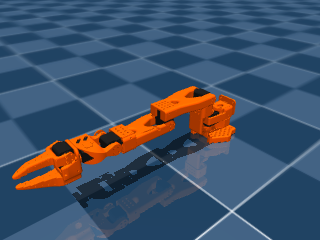

[ 0.5 -0.5 -0.5  0.   0.5 -0.5]
[0.5 0.5 0.5 0.  0.5 0. ]
[ 0.5  0.5 -0.5  0.   0.   0. ]
[-0.5  0.5 -0.5  0.5  0.   0. ]
[ 0.   0.5 -0.5 -0.5  0.   0. ]
[-0.5 -0.5  0.   0.5  0.   0. ]
[-0.5  0.5 -0.5  0.5  0.  -0.5]
[-0.5 -0.5  0.5 -0.5 -0.5  0.5]
[0.  0.  0.5 0.5 0.5 0. ]
[ 0.   0.  -0.5 -0.5  0.5  0.5]
[ 0.5  0.  -0.5  0.5  0.5  0. ]
[ 0.  -0.5  0.  -0.5 -0.5  0.5]
[ 0.5  0.5  0.5 -0.5 -0.5 -0.5]
[ 0.5 -0.5  0.   0.5  0.   0. ]
[ 0.   0.   0.5 -0.5  0.5 -0.5]
[-0.5  0.5  0.  -0.5 -0.5 -0.5]
[-0.5  0.  -0.5  0.5  0.5 -0.5]
[ 0.5 -0.5  0.5  0.5  0.5  0.5]
[ 0.5  0.  -0.5  0.  -0.5  0.5]
[-0.5  0.5 -0.5  0.5  0.5  0.5]
[0.5 0.  0.5 0.5 0.5 0.5]
[ 0.   0.5 -0.5  0.   0.5  0.5]
[ 0.   0.   0.   0.5 -0.5  0.5]
[ 0.  -0.5  0.  -0.5  0.5  0. ]
[ 0.   0.5 -0.5  0.  -0.5  0. ]
[ 0.   0.5  0.  -0.5  0.5  0. ]
[-0.5 -0.5  0.   0.5  0.   0. ]
[0.  0.  0.  0.5 0.5 0.5]
[-0.5 -0.5  0.  -0.5  0.  -0.5]
[ 0.  -0.5 -0.5  0.5  0.5 -0.5]
[ 0.  -0.5  0.5  0.   0.   0. ]
[0.  0.5 0.5 0.  0.  0. ]
[ 0.  

  0%|          | 0/5000 [00:03<?, ?it/s]

[0.5 0.5 0.5 0.  0.5 0. ]
[-0.5  0.5  0.   0.  -0.5 -0.5]
[-0.5 -0.5  0.5  0.5 -0.5  0.5]
[ 0.   0.  -0.5  0.5  0.5 -0.5]
[ 0.  -0.5  0.5 -0.5  0.5 -0.5]
[ 0.  -0.5 -0.5  0.   0.   0. ]
[ 0.   0.5 -0.5  0.   0.   0. ]
[-0.5 -0.5  0.   0.5  0.  -0.5]
[ 0.   0.5 -0.5  0.   0.   0. ]
[ 0.  -0.5  0.5 -0.5 -0.5 -0.5]
[-0.5  0.5 -0.5  0.   0.5  0.5]
[ 0.   0.   0.   0.   0.  -0.5]
[0.  0.5 0.5 0.  0.  0. ]
[ 0.   0.5 -0.5  0.   0.   0. ]
[ 0.   0.   0.   0.   0.5 -0.5]
[ 0.5 -0.5  0.   0.  -0.5 -0.5]
[ 0.  -0.5 -0.5  0.   0.   0. ]
[0.  0.5 0.5 0.  0.  0. ]
[ 0.  -0.5  0.5  0.   0.   0. ]
[ 0.  -0.5 -0.5  0.   0.   0. ]
[ 0.5  0.   0.5 -0.5 -0.5  0. ]
[ 0.5  0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.  -0.5  0.   0. ]
[-0.5 -0.5  0.5  0.5 -0.5 -0.5]
[0.  0.  0.5 0.5 0.5 0.5]
[ 0.5 -0.5  0.5 -0.5 -0.5 -0.5]
[-0.5  0.5 -0.5  0.5  0.5 -0.5]
[ 0.   0.5 -0.5  0.   0.   0. ]
[-0.5  0.   0.   0.5  0.5  0.5]
[ 0.5  0.5 -0.5  0.5  0.   0. ]
[0.  0.5 0.5 0.  0.  0. ]
[ 0.5 -0.5  0.5  0.   0.   0. ]
[-0.5 

KeyboardInterrupt: 

In [4]:
import numpy as np
import mujoco
import json
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from DQNAgent import DQNAgent
from pathlib import Path
import mediapy as media

# Cargar configuración de Q-learning
with open('qlearning.json', 'r') as file:
    data = json.load(file)

# Parámetros de DQN
max_epsilon = data['max_epsilon']
min_epsilon = data['min_epsilon']
decay_rate = data['decay_rate']  # Decaimiento más lento para explorar más
gamma = data['gamma']
learning_rate = data['lr']
memory_size = data['mem_size']  # Memoria más grande para mejorar el aprendizaje
batch_size = data['batchsize']

# Cargar modelo MuJoCo
model_dir = Path("trs_so_arm100")
model_xml = model_dir / "scene.xml"

class RoboticArmEnv():
    def __init__(self):
        # Cargar modelo MuJoCo
        self.model = mujoco.MjModel.from_xml_path(str(model_xml))
        self.data = mujoco.MjData(self.model)

        # Espacio de observación (posiciones y velocidades)
        self.state_dim = self.model.nq + self.model.nv
        self.action_dim = self.model.nu
        self.num_actions = 3 ** self.action_dim

        # Agregar renderer para capturar imágenes
        self.renderer = mujoco.Renderer(self.model)

        self.agent = DQNAgent(state_dim=self.state_dim,
                              num_actions=self.num_actions,
                              action_dim=self.action_dim,
                              gamma=gamma,
                              epsilon=max_epsilon,
                              epsilon_min=min_epsilon,
                              epsilon_decay=decay_rate,
                              learning_rate=learning_rate,
                              memory_size=memory_size,
                              batch_size=batch_size)

        self.target_position = np.array([0, -1.57079, 1.57079, 1.57079, -1.57079, 0])  # Meta deseada 0.      -1.57079  1.57079  1.57079 -1.57079  0. 
        self.prev_qpos = self.data.qpos.copy()  # Para calcular mejora en recompensa
        self.reset()

    def step(self, action):
        # Convertir acción discreta en torques continuos
        action_values = [a * 0.5 for a in action]
        self.data.ctrl[:] = action_values
        print(self.data.ctrl[:])
        mujoco.mj_step(self.model, self.data)

        # Obtener observación
        obs = np.concatenate([self.data.qpos, self.data.qvel])

        # Calcular recompensa basada en distancia
        distance = np.linalg.norm(self.target_position - self.data.qpos)
        prev_distance = np.linalg.norm(self.target_position - self.prev_qpos)
        improvement = prev_distance - distance

        reward = improvement * 10 - distance  # Premia acercarse, penaliza distancia
        self.prev_qpos = self.data.qpos.copy()  # Guardar la posición actual

        done = distance < 0.05  # Termina si alcanza la meta
        return obs, reward, done

    def reset(self):
        mujoco.mj_resetData(self.model, self.data)
        self.prev_qpos = self.data.qpos.copy()  # Reiniciar posición previa
        return np.concatenate([self.data.qpos, self.data.qvel])

    def train(self, episodes=5000):  # Entrenamos por más episodios
        success_history = []

        for episode in tqdm(range(episodes)):
            state = self.reset()
            done = False
            total_reward = 0
            x = 0

            while not done:
                action = self.agent.get_action(state)
                next_state, reward, done = self.step(action)

                # Guardar experiencia en memoria
                self.agent.store_transition(state, action, reward, next_state, done)

                # Entrenar el agente
                self.agent.replay()

                state = next_state
                total_reward += reward

                # Renderizar y mostrar un frame cada 1000 episodios
                if x % 10000 == 0:
                    print(f"Rendering frame at episode {episode}...")
                    self.renderer.update_scene(self.data)
                    media.show_image(self.renderer.render())
                x += 1

            success_history.append(total_reward)

            if episode % 50 == 0:
                print(f"Episode {episode}: Reward {total_reward:.2f}")

        # Guardar modelo entrenado
        torch.save({
            'policy_net_state_dict': self.agent.policy_net.state_dict(),
            'target_net_state_dict': self.agent.target_net.state_dict(),
            'optimizer_state_dict': self.agent.optimizer.state_dict(),
        }, 'Checkpoint/dqn_robotic_arm.pth')

        # Graficar desempeño
        plt.plot(success_history)
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title("Training Progress")
        plt.show()

# Entrenar el agente
if __name__ == "__main__":
    env = RoboticArmEnv()
    env.train(episodes=5000)
